# PREDICTING HEART DISEASE USING MACHINE LEARNING

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a model capable of predicting whether or not someone has heart disease based on their medical attributes.


## What is classification?
Classification involves deciding whether a sample is part of one class or another (binary classification).

If there are multiple class options, it's referred to as multi-class classification.

### Approach/Thinking Process:
1. **Problem Definition**  
2. **Data**  
3. **Evaluation**  
4. **Features**  
5. **Modeling**  
6. **Experimentation**  

## 1. Problem Defination

In a statement,
>This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease classification.
For example, given a person's health characteristics,   build a model to predict whether or not they have heart disease.
It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

## 2. Evaluation
> "If   95% accuracy in predicting whether or not a patient has heart disease during the proof of concept,proceed with the project."

## 3. Features

> In this section,  detailed information about the various features in the dataset. You can gather this information by conducting research (for example, reviewing the links provided earlier) or consulting with a subject matter expert familiar with the dataset.

**Data Dictionary:**

1. **age** - Age of the patient (in years)
2. **sex** - Gender of the patient (1 = male, 0 = female)
3. **cp** - Type of chest pain:
   * 0: Typical angina (chest pain due to reduced blood supply to the heart)
   * 1: Atypical angina (chest pain not related to the heart)
   * 2: Non-anginal pain (typically esophageal spasms, not heart-related)
   * 3: Asymptomatic (chest pain without signs of disease)
4. **trestbps** - Resting blood pressure (in mm Hg on admission to the hospital). Any value above 130-140 mm Hg is typically concerning.
5. **chol** - Serum cholesterol levels (in mg/dL):
   * Serum = LDL + HDL + 0.2 * triglycerides
   * A value above 200 mg/dL is generally a cause for concern.
6. **fbs** - Fasting blood sugar (> 120 mg/dL) (1 = true, 0 = false):
   * A value greater than 126 mg/dL indicates potential diabetes.
7. **restecg** - Resting electrocardiographic results:
   * 0: No abnormalities detected
   * 1: ST-T wave abnormality (can range from mild symptoms to severe issues)
   * 2: Possible or definite left ventricular hypertrophy (enlarged heart's main pumping chamber)
8. **thalach** - Maximum heart rate achieved
9. **exang** - Exercise-induced angina (1 = yes, 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest, indicating the heart’s stress during exercise (an unhealthy heart will show greater stress).
11. **slope** - The slope of the peak exercise ST segment:
   * 0: Upsloping (better heart rate response during exercise, uncommon)
   * 1: Flat sloping (minimal change, typical for a healthy heart)
   * 2: Downsloping (indicates an unhealthy heart)
12. **ca** - Number of major vessels (0-3) colored by fluoroscopy:
   * Colored vessels indicate the presence of blood flow, which is better when there are no clots.
13. **thal** - Thalium stress test result:
   * 1,3: Normal
   * 6: Fixed defect (previous defect that is now okay)
   * 7: Reversible defect (no proper blood movement during exercise)
14. **target** - Target attribute indicating whether or not the patient has heart disease:
   * 1 = Yes, the patient has heart disease
   * 0 = No, the patient does not have heart disease


## Preparing the tools
Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [23]:
#Regular EDA and plotting libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#Model from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load te Data

In [5]:
df= pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#Any missing Value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [13]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
#Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


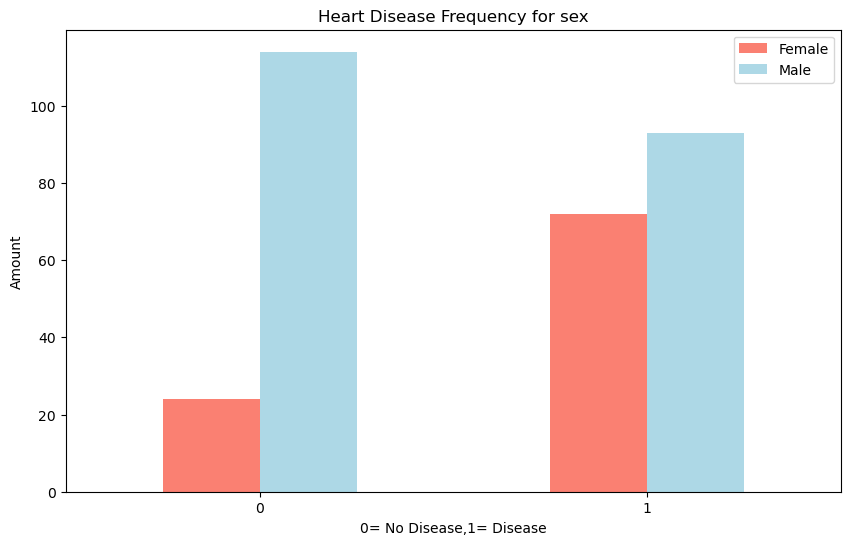

In [18]:
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0= No Disease,1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

In [19]:
df["thalach"].value_counts()

thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs Max Heart Rate for Heart Disease

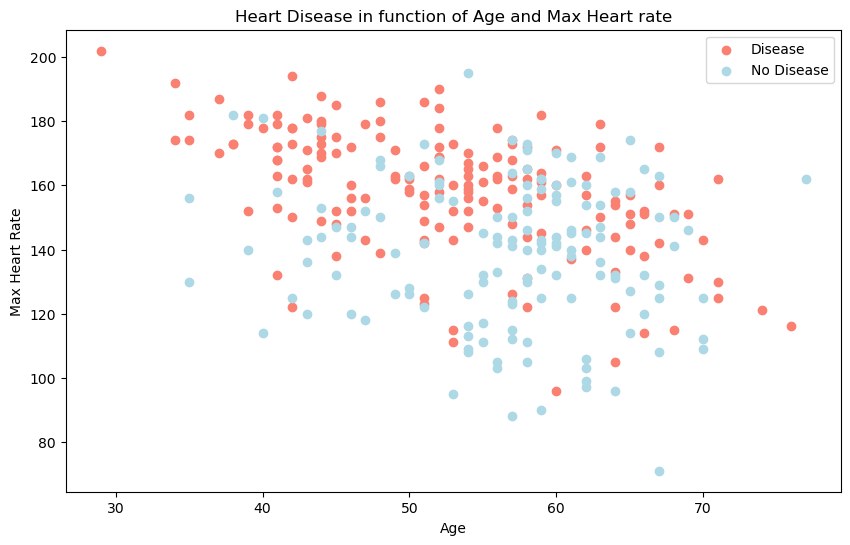

In [26]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
plt.xticks(rotation=0)
plt.show()

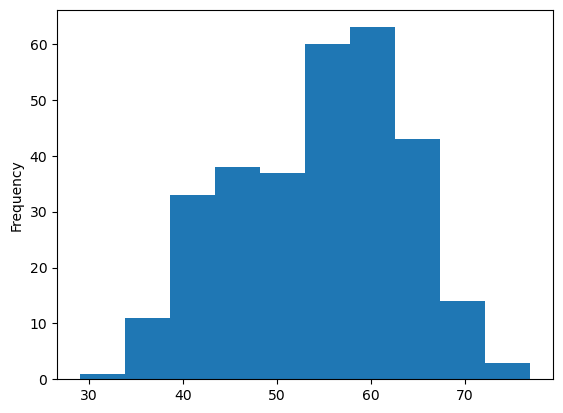

In [27]:
df.age.plot.hist()

plt.show()

## Heart Disease  Frequency per Chest Pain Type

In [28]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


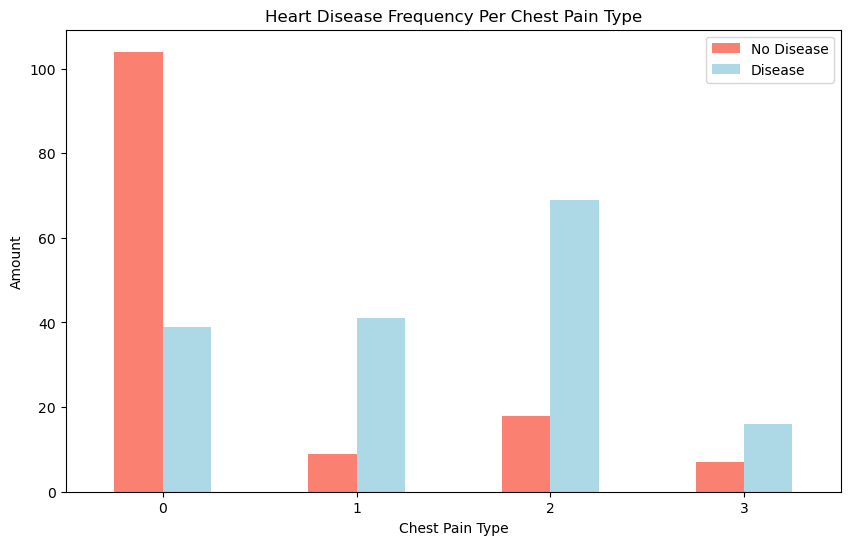

In [29]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)
plt.show()

In [30]:
#Make a crorrelational matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


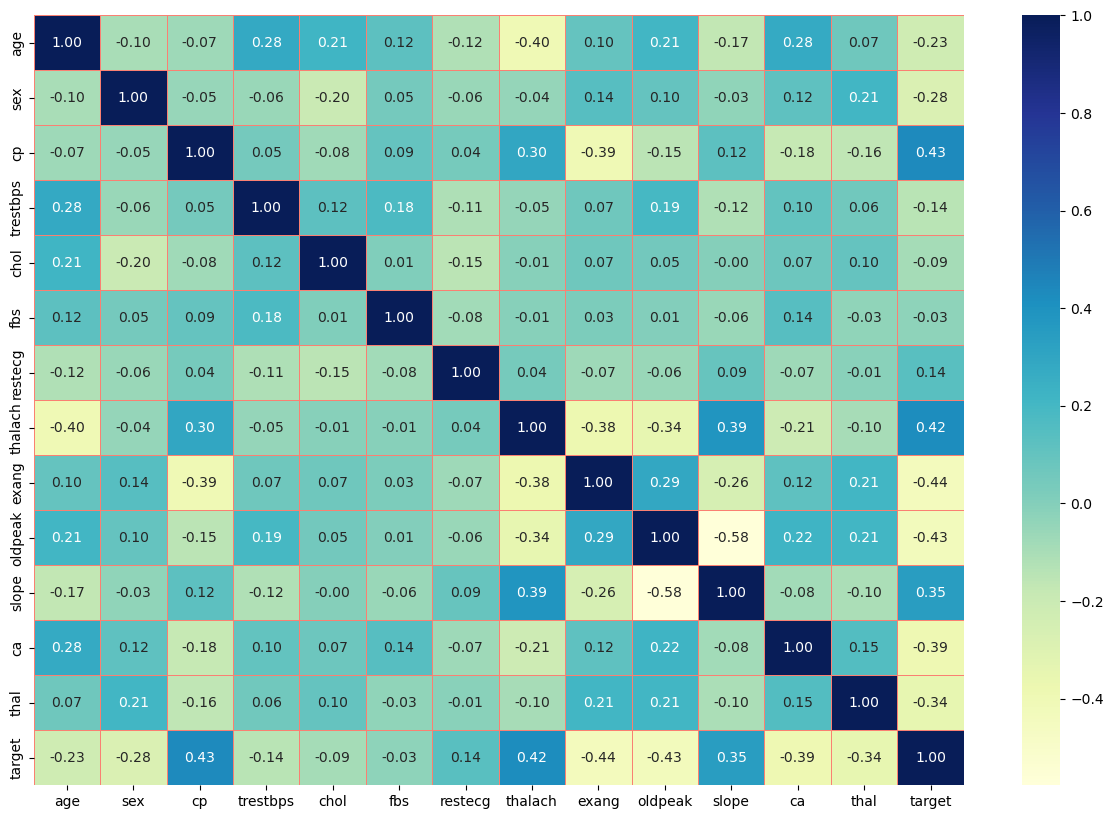

In [37]:
corr_max=df.corr()
fig, ax= plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_max,annot=True,linewidths=0.5,fmt=".2f",linecolor="salmon",cmap="YlGnBu")
plt.show()

## MODELLING

In [38]:
X=df.drop("target",axis=1)
y=df["target"]

In [39]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [40]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [44]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [45]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [46]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### It's time to build Machine Learning Model

Differnt Machine Learning Models willl be tried on

In [52]:
#Put models in Dictionary

models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
#Function
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)

    model_scores={}
    for name,model in models.items():
        #fit the model to data
        model.fit(X_train,y_train)
        #Evaluation
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [53]:
model_scores= fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

E:\ayushi\project\Heart Disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

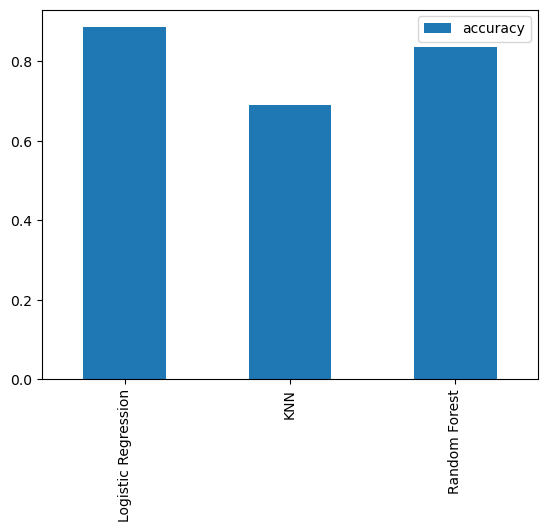

In [58]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()
plt.show()

### Now we have a Baseline Model

## Hyperparameter tuning

In [60]:
train_scores=[]
test_scores=[]
neghbors=range(1,21)

knn=KNeighborsClassifier()

for i in neghbors:
    knn.set_params(n_neighbors=i)

    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))

    test_scores.append(knn.score(X_test,y_test))

In [61]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [63]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum test score: 75.41%


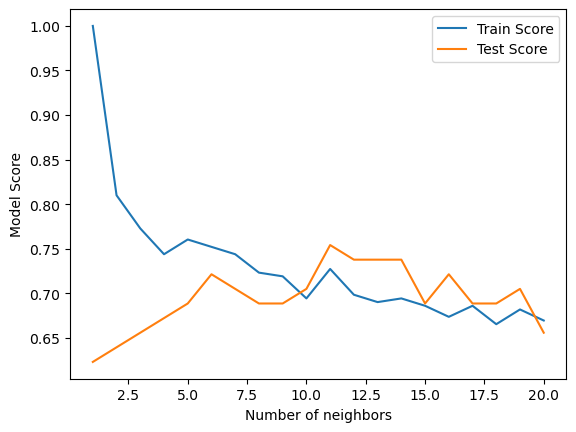

In [64]:
plt.plot(neghbors,train_scores,label="Train Score")
plt.plot(neghbors,test_scores,label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum test score: {max(test_scores)*100:.2f}%")
plt.show()

### It's lower than other two.

## Hyperparameter tuning with RandomizedSearchCV

In [74]:
#Hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

#Hyperparameter Grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [67]:
#Tune LogisticRegression
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [68]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [70]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

## Now Tune Random Forest Classifier

In [75]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [76]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [77]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [78]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter using GridSearchCV

In [79]:
#Differnt Hyperparameters for Logistic Regession

log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [80]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [81]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [85]:
#Make Preditions with tunned model
y_preds=gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## ROC Curve

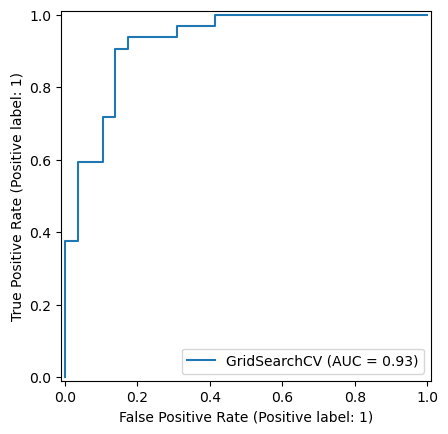

In [87]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

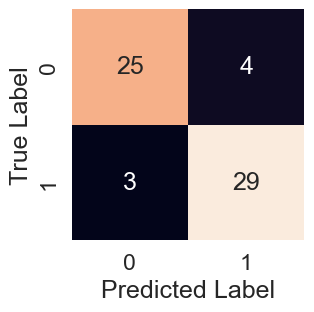

In [90]:
# Confusion Matrix

sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax= plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test,y_preds)
plt.show()

## Classification Report 

In [91]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Cross Validation

In [92]:
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [93]:
clf=LogisticRegression(C= 0.20433597178569418, solver= "liblinear")

In [95]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [102]:
# Cross-validated precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [103]:
# Cross-validated recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [105]:
# Cross-validated f1-score
cv_f1_score=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1_score=np.mean(cv_f1_score)
cv_f1_score

np.float64(0.8673007976269721)

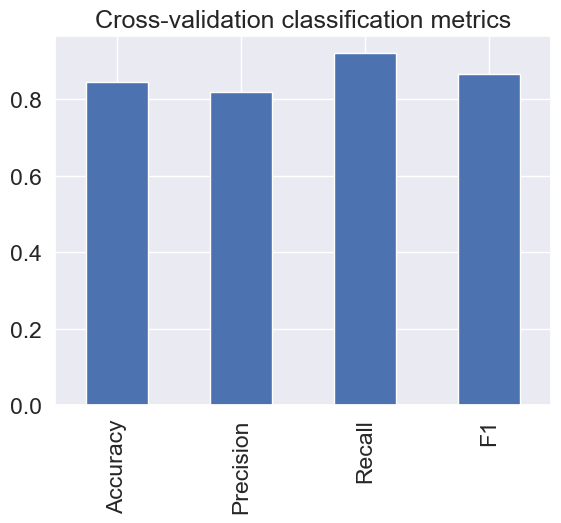

In [108]:
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1_score
}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validation classification metrics", legend=False)
plt.show()


### Feature Importance for Logistic Regression Model

In [110]:
clf=LogisticRegression(C= 0.20433597178569418, solver= "liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [111]:
clf.coef_

array([[ 0.00316727, -0.86044582,  0.66067073, -0.01156993, -0.00166374,
         0.04386131,  0.31275787,  0.02459361, -0.60413038, -0.56862852,
         0.45051617, -0.63609863, -0.67663375]])

In [112]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672721856887734),
 'sex': np.float64(-0.860445816920919),
 'cp': np.float64(0.6606707303492849),
 'trestbps': np.float64(-0.011569930902919925),
 'chol': np.float64(-0.001663741604035976),
 'fbs': np.float64(0.04386130751482091),
 'restecg': np.float64(0.3127578715206996),
 'thalach': np.float64(0.02459360818122666),
 'exang': np.float64(-0.6041303799858143),
 'oldpeak': np.float64(-0.5686285194546157),
 'slope': np.float64(0.4505161679452401),
 'ca': np.float64(-0.6360986316921434),
 'thal': np.float64(-0.6766337521354281)}

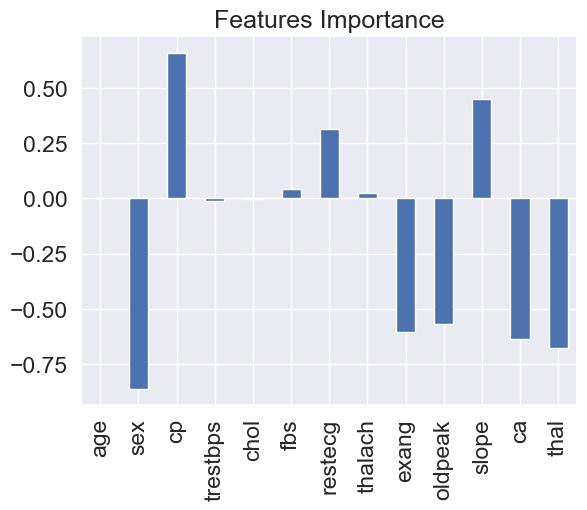

In [113]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Features Importance",legend=False)
plt.show()